In [1]:
import numpy as np
import pandas as pd
import os
import tarfile

In [2]:
DATASETS_DIR = "data"
DATASETS_TGZ = "datasets.tgz"
UNPACKED_DIR = os.path.join("data", "unpacked")

In [3]:
os.makedirs(UNPACKED_DIR, exist_ok=True)
tgz_path = os.path.join(DATASETS_DIR, DATASETS_TGZ)
dataset_tgz = tarfile.open(tgz_path)
dataset_tgz.extractall(path=UNPACKED_DIR)
dataset_tgz.close()

In [4]:
def read_csv_dataset(name, path=UNPACKED_DIR):
    csv_path = os.path.join(path, name + ".csv")
    return pd.read_csv(csv_path)

titanic_ds = read_csv_dataset("Titanic")
diamonds_ds = read_csv_dataset("diamonds")

## Training and Visualizing a Decision Tree

In [5]:
from sklearn.model_selection import train_test_split

titanic_ds["Sex"] = (titanic_ds["Sex"] == "male").astype(np.int32)

feature_names = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
X, y = titanic_ds[feature_names], titanic_ds["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_new, y_new = X_test[:3], y_test[:3]
X_train.shape, y_train.shape

((668, 6), (668,))

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42, max_depth=2)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

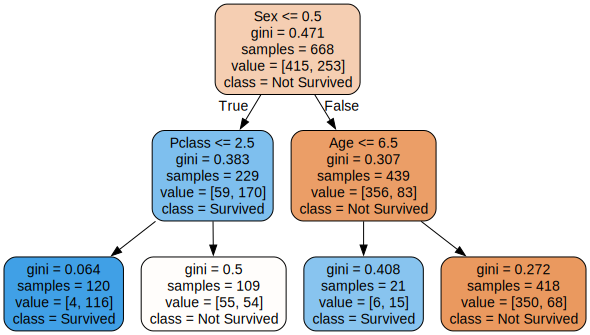

In [7]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="temp_graph.dot",
    feature_names=feature_names,
    class_names=["Not Survived", "Survived"],
    rounded=True,
    filled=True
)

Source.from_file("temp_graph.dot")

## Making Predictions

In [8]:
tree_clf.score(X_test, y_test) # accuracy

0.7757847533632287

In [9]:
y_pred = tree_clf.predict(X_new)
y_pred

array([0, 0, 0], dtype=int64)

In [10]:
y_new

709    1
439    0
840    0
Name: Survived, dtype: int64

## Estimating Class Probabilities

In [11]:
tree_clf.predict_proba(X_new.iloc[[1]])

array([[0.83732057, 0.16267943]])

In [12]:
tree_clf.predict(X_new.iloc[[1]])

array([0], dtype=int64)

In [13]:
y_new.iloc[[1]]

439    0
Name: Survived, dtype: int64

## Regularization Hyperparameters

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [2, 3, 4, 5, 6],
    "min_samples_split": [2, 3, 4, 5, 10, 20],
    "min_samples_leaf": [1, 2, 3, 4, 5, 10, 20],
}

tree_clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree_clf, param_grid, cv=4, scoring="accuracy", return_train_score=True,
                           n_jobs=-1, verbose=2, pre_dispatch="2*n_jobs")
grid_search.fit(X, y)

Fitting 4 folds for each of 210 candidates, totalling 840 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20],
                         'min_samples_split': [2, 3, 4, 5, 10, 20]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [15]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [16]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=42)

In [17]:
grid_search_accuracy = grid_search.best_score_
grid_search_accuracy

0.8193249303114774

## Regression

In [18]:
feature_names = ["carat", "depth", "table", "x", "y", "z"]
X, y = diamonds_ds[feature_names], diamonds_ds["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_new, y_new = X_test[:3], y_test[:3]
X_train.shape, y_train.shape

((40455, 6), (40455,))

#### No restrictions

In [19]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [20]:
tree_reg.score(X_test, y_test) # R^2 value

0.7803886951116062

In [21]:
y_pred = tree_reg.predict(X_new)
y_pred

array([ 559., 1442., 1074.])

In [22]:
y_new

1388      559
50052    2201
41645    1238
Name: price, dtype: int64

#### max_depth = 2

In [23]:
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [24]:
tree_reg.score(X_test, y_test) # R^2 value

0.829824781606563

In [25]:
y_pred = tree_reg.predict(X_new)
y_pred

array([1057.23265656, 1057.23265656, 1057.23265656])

In [26]:
y_new

1388      559
50052    2201
41645    1238
Name: price, dtype: int64

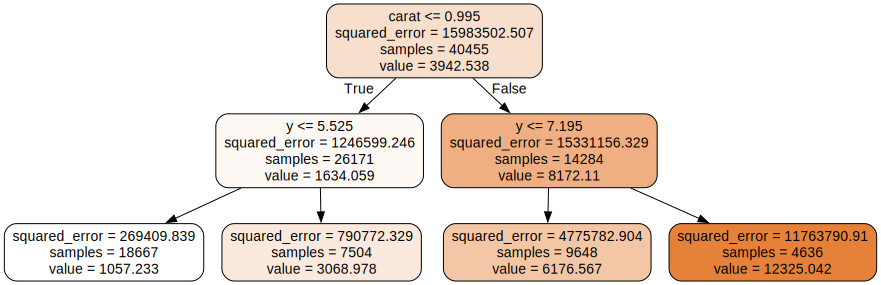

In [27]:
export_graphviz(
    tree_reg,
    out_file="temp_graph.dot",
    feature_names=feature_names,
    rounded=True,
    filled=True
)

Source.from_file("temp_graph.dot")

#### max_depth = 3

In [28]:
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [29]:
tree_reg.score(X_test, y_test) # R^2 value

0.8709662029311989

In [30]:
y_pred = tree_reg.predict(X_new)
y_pred

array([ 786.6544647 , 1687.15065074,  786.6544647 ])

In [31]:
y_new

1388      559
50052    2201
41645    1238
Name: price, dtype: int64